## Data augmentations for HTR (Hungarain based)

This notebook shows an effective data augmentation a way for OCR, as discussed in this article <a href = "https://towardsdatascience.com/effective-data-augmentation-for-ocr-8013080aa9fa">Source</a> :

* It is important to split test set before Data Augmentation so we do aug on already splited data
* This method is an expiermntal way we have to take care during doing transformeration where some times text will be cropped so our suggestion is to to choose approprate parameters values and try to use as much as possible aug. way supported by OpenV an Albumation library  
* This dataset are not allawed to use for any purpose where it is provided by [DH-Lab ELTE researchers](https://dh-lab.hu/) for acadimac resarch  . 

Sample figuer show how to augment data with image-text pairs   <br>
<img SRC= "https://drive.google.com/uc?id=1P6UK-X7iuuAFq38HsTjc4HfudOJ9-VTQ">

## Import libraries  

In [ ]:
import os , time ,random ,shutil ,requests ,json ,zipfile , time
import cv2
import numpy as np
import pandas as pd
import albumentations as A
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path
from google.colab import files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#gets PIL image and returns augmented PIL image
def augment_img(img):
  #only augment 3/4th the images
  if random.randint(1, 4) > 3:
      return img
  
  img = np.asarray(img)     # convert to numpy for opencv

  # morphological alterations
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
  if random.randint(1, 5) == 1:
    # dilation because the image is not inverted
    img = cv2.erode(img, kernel, iterations=random.randint(1, 2))
  if random.randint(1, 6) == 1:
    # erosion because the image is not inverted
    img = cv2.dilate(img, kernel,iterations=random.randint(1, 1))
  
  transform = A.Compose([
      
    A.OneOf([
      # add black pixels noise
      A.OneOf([
             A.RandomRain(brightness_coefficient= 0.9, drop_length=1, drop_width=1, drop_color = (0, 0, 0), blur_value=2, rain_type = 'drizzle', p=0.05), 
              A.RandomShadow(p=1),
              A.PixelDropout(p=1),
         ], p=0.8),

      # add white pixels noise
      A.OneOf([
              A.PixelDropout(dropout_prob=0.5,drop_value=255,p=1),
             A.RandomRain(brightness_coefficient=1.0, drop_length=2, drop_width=2, drop_color = (252, 255, 205), blur_value=1, rain_type = None, p=1), 
        ], p=0.9),
    ], p=1),

    # transformations
    A.OneOf([
            A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.25, rotate_limit=2, border_mode=cv2.BORDER_CONSTANT, value=(255,255,255),p=1),
            A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0, rotate_limit=3, border_mode=cv2.BORDER_CONSTANT, value=(255,255,255),p=1),
            A.ShiftScaleRotate(shift_limit=0.02, scale_limit=0.15, rotate_limit=5, border_mode=cv2.BORDER_CONSTANT, value=(255,255,255),p=1),  
            A.Affine(shear=random.randint(-5, 5),mode=cv2.BORDER_CONSTANT, cval=(255,255,255), p=1)          
       ], p=0.5),
    A.Blur(blur_limit=5,p=0.25),
  ])
  img = transform(image=img)['image']  
  image = Image.fromarray(img)   
  return image


In [ ]:
working_dir = '/content/drive/MyDrive/DataAug/Data/'
train_text = f'{working_dir}source/train.jsonl'
def load_jsonl():
    return pd.read_json(
                        path_or_buf = train_text,
                        lines=True,
                        )
train_text

'/content/drive/MyDrive/DataAug/Data/source/train.jsonl'

In [ ]:
df = load_jsonl()
print(f'length of df : {len(df)} \n',df.head())

length of df : 5697 
                           file_name                         text
0  RALK987_1865_817_120_001-001.jpg         Csengery Antal r. t.
1  RALK987_1865_817_120_001-002.jpg           Szabó József l. t.
2  RALK987_1865_817_120_001-003.jpg               Tekintetes úr!
3  RALK987_1865_817_120_001-004.jpg  Szilágyi István lev. tagnak
4  RALK987_1865_817_120_001-005.jpg   az e havi a folyó hó 22-én


### Show Random sample

harmadik
RALK987_1865_817_253_001-010.jpg


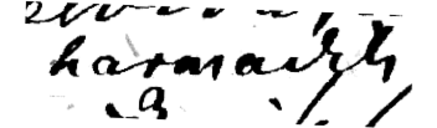

In [ ]:
source_imags_path = '/content/drive/MyDrive/DataAug/Data/source/images/' 
idx = random.randint(0,len(df))
print(df['text'][idx])
print(df['file_name'][idx])
Image.open(source_imags_path + df['file_name'][idx]).convert("RGB")

Let's run the above function on some samples

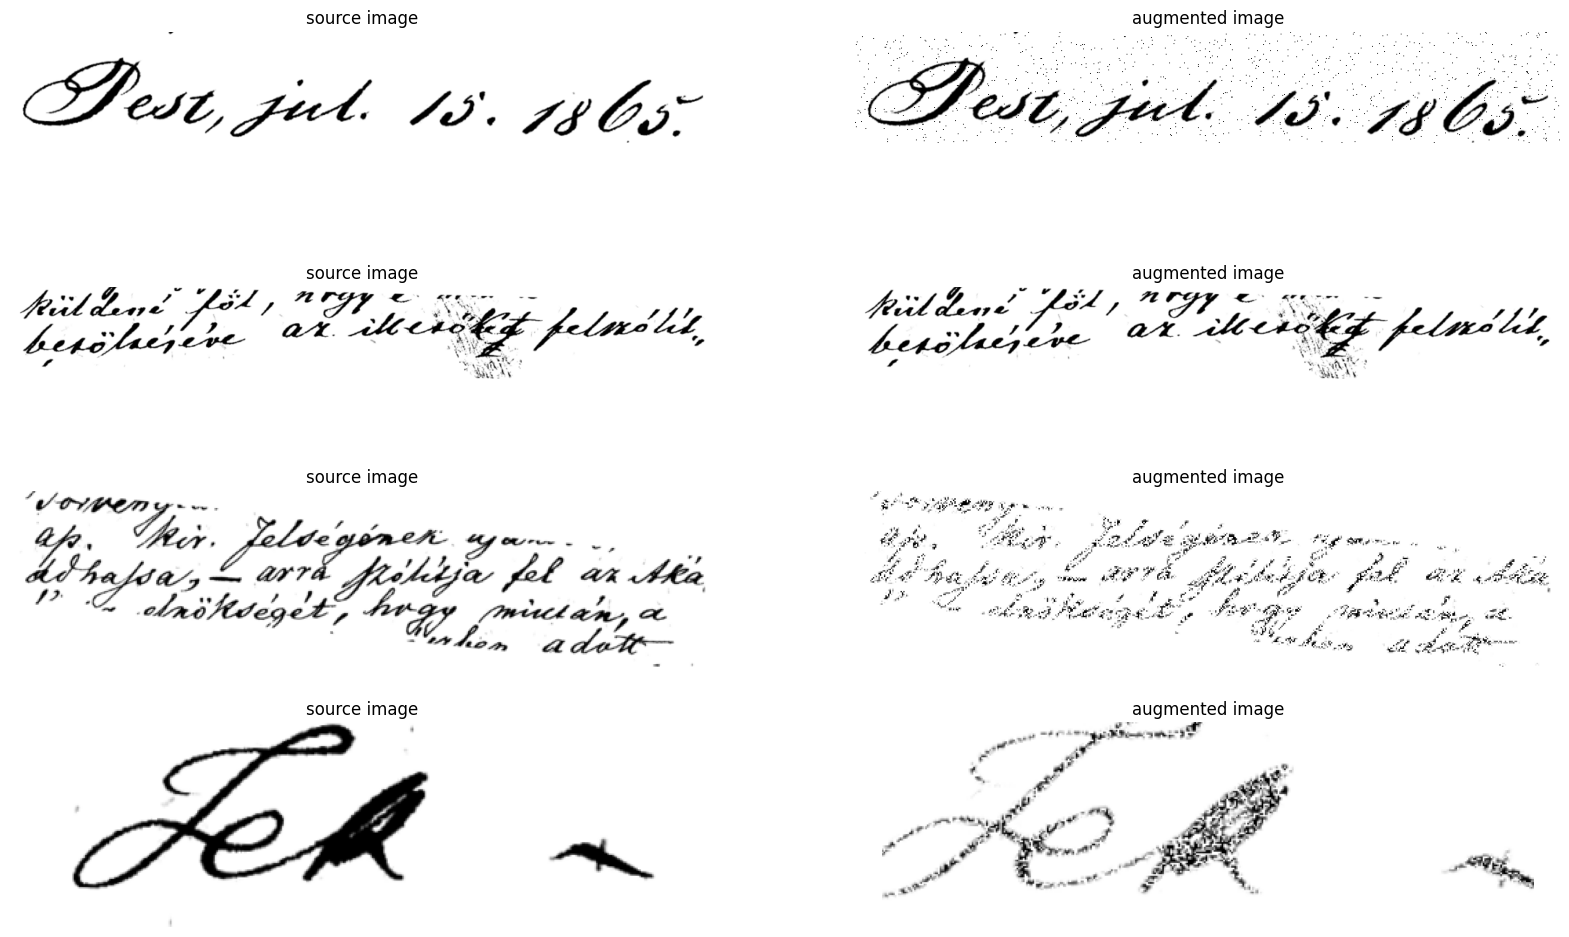

In [ ]:
#take sample and do augmentations
sample_amount =  8
# image1 = Image.open(requests.get('https://neontreebot.be/data/prefernot.jpg', stream=True).raw).convert("RGB")

# to do choose randomly
idx1 = random.randint(0,len(df))
idx2 = random.randint(0,len(df))
idx3 = random.randint(0,len(df))
idx4 = random.randint(0,len(df))

image1 = Image.open(source_imags_path + df['file_name'][idx1]).convert("RGB")
image2 = Image.open(source_imags_path + df['file_name'][idx2]).convert("RGB")
image3 = Image.open(source_imags_path + df['file_name'][idx3]).convert("RGB")
image4 = Image.open(source_imags_path + df['file_name'][idx4]).convert("RGB")
plt.figure(figsize=(20,25))
i = 1
plt.subplot(sample_amount, 2, i).imshow(image1)
plt.subplot(sample_amount, 2, i).set_title('source image')
plt.subplot(sample_amount, 2, i).set_axis_off() 
plt.subplot(sample_amount, 2, i + 1).imshow(augment_img(image1))
plt.subplot(sample_amount, 2, i + 1).set_title('augmented image')
plt.subplot(sample_amount, 2, i + 1).set_axis_off() 
i = 3
plt.subplot(sample_amount, 2, i).imshow(image2)
plt.subplot(sample_amount, 2, i).set_title('source image')
plt.subplot(sample_amount, 2, i).set_axis_off() 
plt.subplot(sample_amount, 2, i + 1).imshow(augment_img(image2))
plt.subplot(sample_amount, 2, i + 1).set_title('augmented image')
plt.subplot(sample_amount, 2, i + 1).set_axis_off()
i = 5
plt.subplot(sample_amount, 2, i).imshow(image3)
plt.subplot(sample_amount, 2, i).set_title('source image')
plt.subplot(sample_amount, 2, i).set_axis_off() 
plt.subplot(sample_amount, 2, i + 1).imshow(augment_img(image3))
plt.subplot(sample_amount, 2, i + 1).set_title('augmented image')
plt.subplot(sample_amount, 2, i + 1).set_axis_off() 
i = 7
plt.subplot(sample_amount, 2, i).imshow(image4)
plt.subplot(sample_amount, 2, i).set_title('source image')
plt.subplot(sample_amount, 2, i).set_axis_off() 
plt.subplot(sample_amount, 2, i + 1).imshow(augment_img(image4))
plt.subplot(sample_amount, 2, i + 1).set_title('augmented image')
plt.subplot(sample_amount, 2, i + 1).set_axis_off() 

## Create a new folder to store the augmented images and the labels file.

In [ ]:
aug_labels_path =  f'{working_dir}destination/aug_labels.jsonl'
aug_imgs = f'{working_dir}destination/aug_imgs'
if not os.path.exists(aug_imgs):
    os.makedirs(aug_imgs)

In [ ]:
# This will be the last resulting dir after combine source with augmented (destenation)
output_imgs_folder = '/content/drive/MyDrive/DataAug/Data/output_dir/imgs'
if not os.path.exists(output_imgs_folder):
    os.makedirs(output_imgs_folder)

In [ ]:
len(os.listdir('/content/drive/MyDrive/DataAug/Data/source/images'))

5997

## Create a new dataframe to store the new file names and corresponding labels.

In [ ]:
new_df = pd.DataFrame(columns=['file_name', 'text'])
new_df

,file_name,text


In [ ]:
# To save the augmented images in the output_imgs_folder directory and create a new new_labels.jsonl file with the updated file names, you can modify the for loop as follows:
sample_amount = 4
# to add tag to see progress
for idx in tqdm(range(len(df))):
    image_path =  os.path.join(source_imags_path, df['file_name'][idx])
    image = Image.open(image_path).convert("RGB")
    for i in range(sample_amount):
        augmented_image = augment_img(image)
        augmented_image_path = os.path.join(aug_imgs, 'aug_' + str(idx * sample_amount + i) + '.jpg')
        augmented_image.save(augmented_image_path)
        # encode "text" file as a Dict format before writing to dataframe 
        dictionary = {"file_name": os.path.basename(augmented_image_path), "text": df['text'][idx]}
        df_dictionary = pd.DataFrame([dictionary])
        new_df = pd.concat([new_df, df_dictionary], ignore_index=True)

new_df.to_json( aug_labels_path ,
                lines=True, 
                orient="records", 
                force_ascii=False)
print('\n',new_df.head())

100%|██████████| 5697/5697 [39:32<00:00,  2.40it/s]


    file_name                  text
0  aug_0.jpg  Csengery Antal r. t.
1  aug_1.jpg  Csengery Antal r. t.
2  aug_2.jpg  Csengery Antal r. t.
3  aug_3.jpg  Csengery Antal r. t.
4  aug_4.jpg    Szabó József l. t.


In [ ]:
# # capture source file 
# source = r'/content/drive/MyDrive/DataAug/Data/destination/aug_imgs/new_labels.jsonl'
# # capture destnation file 
# destination = r'/content/drive/MyDrive/DataAug/Data/destination/'
# shutil.move(source, destination)

'/content/drive/MyDrive/DataAug/Data/destination/new_labels.jsonl'

## Concatenate (source + augumentation)

In [ ]:
# output_dir = f'{working_dir}output_dir'
# if not os.path.exists(output_dir):
#     os.makedirs(output_dir)

### 1- make one images folder

In [ ]:
def move_imgs(source,destination,state ='copy'):
  print('The data process has started :')
  print(f'We will process {len(os.listdir(source_folder))} fiels: from {source_folder}   dir')
  time.sleep(3)
  # fetch all files
  for file_name in os.listdir(source_folder):
      # construct full file path
      source = source_folder + file_name
      destination = destination_folder + file_name  
      # move only files (cut)
      if os.path.isfile(source):
        if state=='copy':
            shutil.copyfile(source, destination)  # CTRL + C
        elif state== 'move': 
            shutil.move(source, destination)  # ctrl + X
  time.sleep(3)
  print(f'number of images after processing {len(os.listdir(destination_folder))}  fiels: to {destination_folder}   dir')

### 1.1 Copy source image 

In [ ]:
source_folder = r"/content/drive/MyDrive/DataAug/Data/source/images/"
destination_folder = r"/content/drive/MyDrive/DataAug/Data/output_dir/imgs/"
move_imgs(source_folder,destination_folder,'copy')

The data process has started :
We will process 5997 fiels: from /content/drive/MyDrive/DataAug/Data/source/images/   dir
number of images after processing 5997  fiels: to /content/drive/MyDrive/DataAug/Data/output_dir/imgs/   dir


### 1.2 Move Augumented images 

In [ ]:
source_folder = r"/content/drive/MyDrive/DataAug/Data/destination/aug_imgs/"
destination_folder = r"/content/drive/MyDrive/DataAug/Data/output_dir/imgs/"
move_imgs(source_folder,destination_folder,'move')

The data process has started :
We will process 22788 fiels: from /content/drive/MyDrive/DataAug/Data/destination/aug_imgs/   dir
number of images after processing 28785  fiels: to /content/drive/MyDrive/DataAug/Data/output_dir/imgs/   dir


## 2 - Make one dataframe file 

In [ ]:
output_dir   = f'{working_dir}output_dir/'                     # path to merge df(s)
input_file1  = f'{working_dir}source/train.jsonl'              # path to df1
input_file2  = f'{working_dir}destination/aug_labels.jsonl'    # path to df2 

def load_jsonl(path):
    return pd.read_json(
                        path_or_buf = f'{path}',
                        lines=True) 

dir_ = [
         input_file1 ,
         input_file2 ,
        ]
        
frames = [load_jsonl(path) for path in dir_]

resulting_df = pd.concat(frames,ignore_index=True)
print(resulting_df.head())

# Converting dataframe to jsonl
time.sleep(3)
reddit = resulting_df.to_dict(orient= "records")
print(type(reddit) , len(reddit))
# we have list of dict[{},{},{}]
with open(f"{output_dir}all_labels.jsonl","w") as f:
    for line in reddit:
        f.write(json.dumps(line,ensure_ascii=False) + "\n")

                          file_name                         text
0  RALK987_1865_817_120_001-001.jpg         Csengery Antal r. t.
1  RALK987_1865_817_120_001-002.jpg           Szabó József l. t.
2  RALK987_1865_817_120_001-003.jpg               Tekintetes úr!
3  RALK987_1865_817_120_001-004.jpg  Szilágyi István lev. tagnak
4  RALK987_1865_817_120_001-005.jpg   az e havi a folyó hó 22-én
<class 'list'> 28485


# 2- Functions to do 1 augmentation only
* In this way you can do one type of augumention at each time in spreate way 

**2.1 Morphological Alterations**

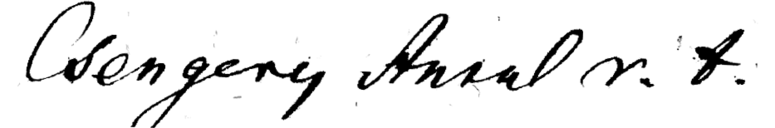

In [ ]:
# Read an image 
path = '/content/drive/MyDrive/TrsOCR_utorial/training-data-ex/img/' 
image = Image.open(path + df['file_name'][0]).convert("RGB")
image

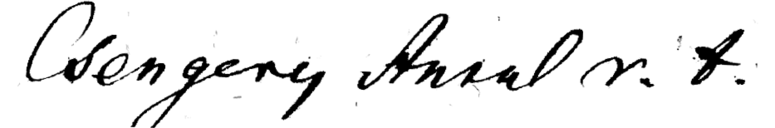

In [ ]:
img = np.asarray(image)     
image = Image.fromarray(img)
image

**2.1.1 - Morphological (dilate)**

In [ ]:
def augment_img_dilate(img):
  img = np.asarray(img)     #convert to numpy
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,1))
  # dilation because the image is not inverted
  img = cv2.erode(img, kernel, iterations=random.randint(2, 4))
  image = Image.fromarray(img)   
  return image

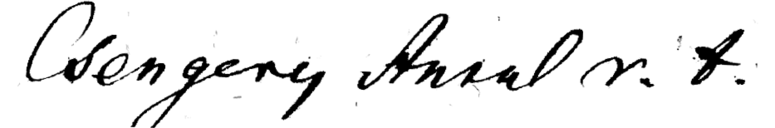

In [ ]:
augment_img_dilate(image)

**2.1.2 - Morphological (erode)**

In [ ]:
def augment_img_erode(img):
  img = np.asarray(img)     #convert to numpy
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2))
  # erosion because the image is not inverted
  img = cv2.dilate(img, kernel,iterations=random.randint(1,1))
  image = Image.fromarray(img)   
  return image

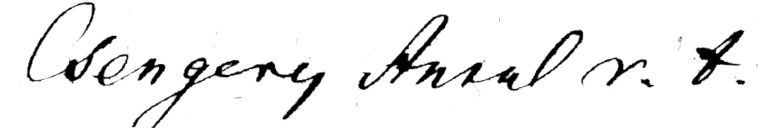

In [ ]:
augment_img_erode(image)

**2.2 - Black Pixel Noise**


In [ ]:
def augment_img_RandomRain_black(img):
  img = np.asarray(img)     # convert to numpy
  transform = A.Compose([
  #add black pixels noise: RandomRain
  A.RandomRain(brightness_coefficient=.9, drop_length=1, drop_width=1, drop_color = (0, 0, 0), blur_value=2, rain_type = 'drizzle', p=1)
    ])
  img = transform(image=img)['image']  
  image = Image.fromarray(img)   
  return image

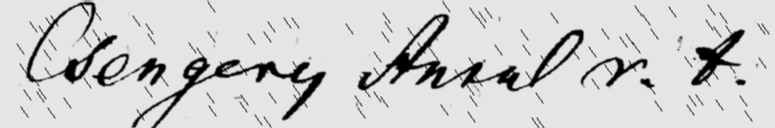

In [ ]:
augment_img_RandomRain_black(image)

In [ ]:
def augment_img_RandomShadow(img):
  img = np.asarray(img)     #convert to numpy
  transform = A.Compose([
  #add black pixels noise: RandomShadow
  A.RandomShadow(p=1)
  #A.PixelDropout(p=1),
  ])
  img = transform(image=img)['image']  
  image = Image.fromarray(img)   
  return image

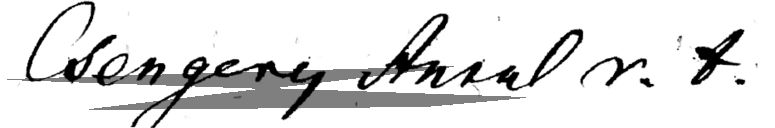

In [ ]:
augment_img_RandomShadow(image)

In [ ]:
def augment_img_PixelDropout_black(img):
  img = np.asarray(img)     #convert to numpy
  transform = A.Compose([
  #add black pixels noise: PixelDropout
  A.PixelDropout(p=1)
  ])
  img = transform(image=img)['image']  
  image = Image.fromarray(img)   
  return image

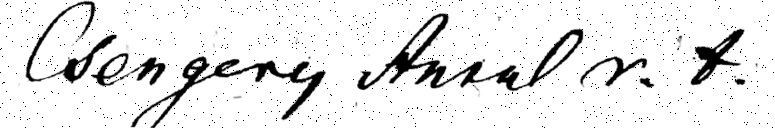

In [ ]:
augment_img_PixelDropout_black(image)

**2.3 - White Pixel Noise**

In [ ]:
def augment_img_RandomRain_white(img):
  img = np.asarray(img)     #convert to numpy
  transform = A.Compose([
  #add white pixels noise: RandomRain
  A.RandomRain(brightness_coefficient=1.0, drop_length=2, drop_width=2, drop_color = (253, 255, 205), blur_value=1, rain_type = None, p=1)
  ])
  img = transform(image=img)['image']  
  image = Image.fromarray(img)   
  return image              

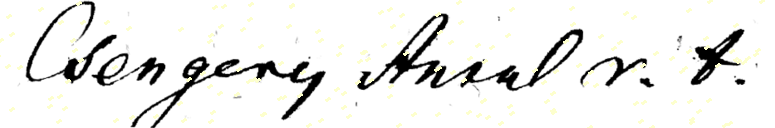

In [ ]:
augment_img_RandomRain_white(image)

In [ ]:
def augment_img_PixelDropout_white(img):
  img = np.asarray(img)     #convert to numpy
  transform = A.Compose([
  #add white pixels noise: PixelDropout
  A.PixelDropout(dropout_prob=0.4,drop_value=250,p=1)
  ])
  img = transform(image=img)['image']  
  image = Image.fromarray(img)   
  return image

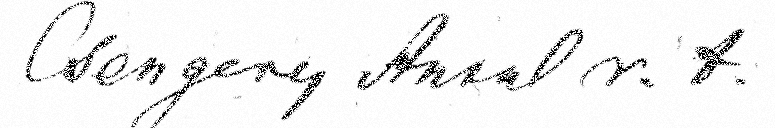

In [ ]:
augment_img_PixelDropout_white(image)

**2.4 - Transformations**

In [ ]:
def augment_img_ShiftScaleRotate(img):
  img = np.asarray(img)     
  transform = A.Compose([
  # add white pixels noise: PixelDropout
  A.OneOf([
            A.ShiftScaleRotate(shift_limit=0, scale_limit=0.2, rotate_limit=2, border_mode=cv2.BORDER_CONSTANT, value=(255,255,255),p=1),
            A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0, rotate_limit=3, border_mode=cv2.BORDER_CONSTANT, value=(255,255,255),p=1),
            A.ShiftScaleRotate(shift_limit=0.02, scale_limit=0.1, rotate_limit=4, border_mode=cv2.BORDER_CONSTANT, value=(255,255,255),p=1),  
            A.Affine(shear=random.randint(-5, 5),mode=cv2.BORDER_CONSTANT, cval=(255,255,255), p=1)          
       ], p=1)
    ])

  img = transform(image=img)['image']  
  image = Image.fromarray(img)   
  return image

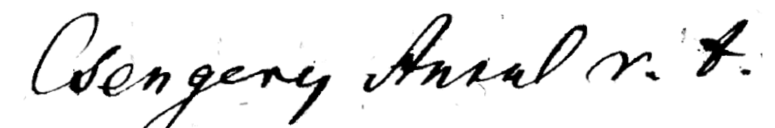

In [ ]:
augment_img_ShiftScaleRotate(image)

In [ ]:
def augment_img_Blur(img):
  img = np.asarray(img)     
  transform = A.Compose([
  A.Blur(blur_limit=3,p=1),
   ])
  img = transform(image=img)['image']  
  image = Image.fromarray(img)   
  return image

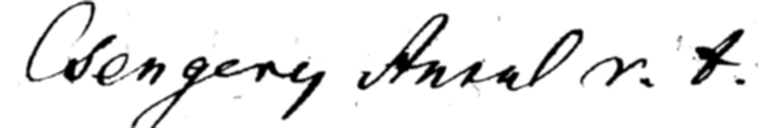

In [ ]:
augment_img_Blur(image)

In [ ]:
len(os.listdir('/content/drive/MyDrive/DataAug/Data/output_dir/imgs'))

27859

## images compression

In [ ]:
# path to the directory you want to zip
dir_path = f"{working_dir}output_dir/imgs/"
# name of the zip file you want to create
zip_filename = "images.zip"

# create a ZipFile object with write mode
with zipfile.ZipFile(zip_filename, 'w') as zip:
    # iterate over all files in the directory
    for root, dirs, files in os.walk(dir_path):
        for file in files:
            # get the full path of the file
            file_path = os.path.join(root, file)
            # add the file to the zip file
            zip.write(file_path, os.path.relpath(file_path, dir_path))

## Download zipped file 

In [ ]:
# path to the zip file on Google Colab
zip_path = "/content/images.zip"
# download the zip file to your local machine
files.download(zip_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Process Missing

In [2]:
path = f'{working_dir}output_dir/'
def load_jsonl(path):
    return pd.read_json(
                        path_or_buf = f'{path}all_labels.jsonl',
                        lines=True) 
df = load_jsonl(path)

# ---------------------------

def is_dir_exist(filename): 
    path = f'{working_dir}output_dir/'
    path_to_file = f'{path}imgs/'+ filename 
    path = Path(path_to_file)
    return path.is_file() 

# ---------------------------

def drop_row(idx):    
    return df.drop(df.index[idx]) 

# ---------------------------

list_fn = [
            df['file_name'][idx]
            for idx in range(len(df))
            if not is_dir_exist(df['file_name'][idx])
          ]
print('list of file names that exist in labels but not in imgs dir: \n', list_fn)

for i in list_fn:
    df.drop(df[df['file_name'] == i ].index, inplace = True)

time.sleep(3)
print("Data frame after processed" , df.head(10))

# save resulting df 
reddit = df.to_dict(orient= "records")
print(type(reddit) , len(reddit))
# we have list of dict[{},{},{}]
with open(f"{path}all__labels.jsonl","w") as f:
    for line in reddit:
        f.write(json.dumps(line,ensure_ascii=False) + "\n")

list of file names that exist in labels but not in imgs dir: 
 ['RALK987_1865_817_127_001-011.jpg', 'RALK987_1865_817_127_001-015.jpg', 'RALK987_1865_817_127_001-031.jpg', 'RALK987_1865_817_127_001-041.jpg', 'RALK987_1865_817_127_001-043.jpg', 'RALK987_1865_817_128_001-002.jpg', 'RALK987_1865_817_128_001-003.jpg', 'RALK987_1865_817_128_001-005.jpg', 'RALK987_1865_817_128_001-010.jpg', 'RALK987_1865_817_128_001-019.jpg', 'RALK987_1865_817_128_001-025.jpg', 'RALK987_1865_817_128_001-031.jpg', 'RALK987_1865_817_128_001-033.jpg', 'RALK987_1865_817_128_001-035.jpg', 'aug_358.jpg', 'aug_359.jpg', 'aug_360.jpg', 'aug_361.jpg', 'aug_362.jpg', 'aug_363.jpg', 'aug_364.jpg', 'aug_365.jpg', 'aug_366.jpg', 'aug_367.jpg', 'aug_368.jpg', 'aug_369.jpg', 'aug_370.jpg', 'aug_371.jpg', 'aug_372.jpg', 'aug_778.jpg', 'aug_779.jpg', 'aug_780.jpg', 'aug_781.jpg', 'aug_782.jpg', 'aug_783.jpg', 'aug_784.jpg', 'aug_785.jpg', 'aug_786.jpg', 'aug_787.jpg', 'aug_788.jpg', 'aug_789.jpg', 'aug_790.jpg', 'aug_791.jpg